<a href="https://colab.research.google.com/github/Mahonry/Machine-Learning/blob/master/MachineLearning_Aplicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')



%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
movies = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/peliculas.csv', encoding = 'utf-8')
movies.shape

(5043, 19)

# Inspeccion de datos

In [3]:
movies.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [5]:
# columnas numericas y de texto

movies.dtypes == float

movie_title                  False
title_year                    True
color                        False
aspect_ratio                  True
duration                      True
language                     False
country                      False
duration.1                    True
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes    False
budget                        True
imdb_score                    True
gross                         True
dtype: bool

In [6]:
movies.dtypes ==  int

movie_title                  False
title_year                   False
color                        False
aspect_ratio                 False
duration                     False
language                     False
country                      False
duration.1                   False
genres                       False
content_rating               False
plot_keywords                False
director_name                False
actor_1_name                 False
actor_2_name                 False
actor_3_name                 False
cast_total_facebook_likes     True
budget                       False
imdb_score                   False
gross                        False
dtype: bool

In [0]:
num = (movies.dtypes == float) | (movies.dtypes ==  int)

In [0]:
obj = movies.dtypes == object

In [9]:
num_cols = [i for i in num.index if num[i] == True]
num_cols

['title_year',
 'aspect_ratio',
 'duration',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

In [10]:
obj_cols = [i for i in obj.index if obj[i] == True]
obj_cols

['movie_title',
 'color',
 'language',
 'country',
 'genres',
 'content_rating',
 'plot_keywords',
 'director_name',
 'actor_1_name',
 'actor_2_name',
 'actor_3_name']

In [0]:
movies_num = movies[num_cols]

## Estadisticas de las columnas numericas

In [12]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


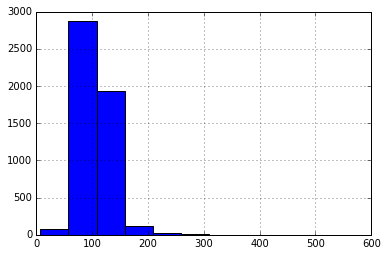

In [13]:
movies_num['duration'].hist()

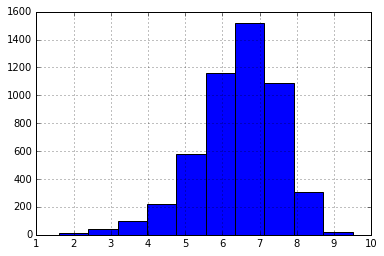

In [14]:
movies_num['imdb_score'].hist()

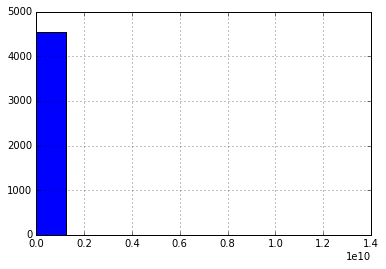

In [15]:
movies_num['budget'].hist()

In [16]:
(movies_num['budget'] > 1e9).value_counts()

False    5037
True        6
Name: budget, dtype: int64

In [0]:
mask = movies_num['budget'] > 1e9

In [18]:
movies[mask]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


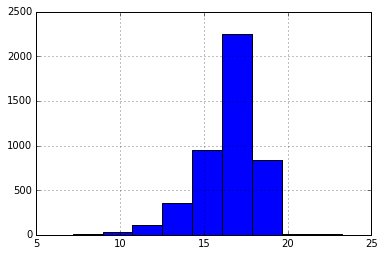

In [19]:
movies_num['log_budget']=np.log(movies_num['budget'])
movies_num['log_budget'].hist()

Tenemos un problema de limpieza de los datos. La BDD fue creada sin diferenciar:

  - La moneda en la que se ingresaba el presupuesto y el ingreso. 
  - La zona (país/mundial) en la que se registro el ingreso.

## Limpieza de datos

In [0]:
financials = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/thenumbers.csv') 

In [21]:
financials = financials[['movie_title','production_budget','worldwide_gross']]
financials.shape

(4341, 3)

In [0]:
movies_num = pd.concat((movies_num, movies['movie_title']), axis = 1)

In [0]:
movies_v2 = pd.merge(financials, movies_num, on = 'movie_title', how = 'left')

In [24]:
movies_v2

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,log_budget
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,19.283571
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,19.519293
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,19.316769
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,19.336971
...,...,...,...,...,...,...,...,...,...,...,...,...
4380,The Mongol King,7000,900,2005.0,NaN,84.0,84.0,93,3250.0,7.8,NaN,8.086410
4381,Signed Sealed Delivered,5000,0,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,NaN
4382,Shanghai Calling,3967,10443,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,NaN
4383,A Plague So Pleasant,1400,0,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,7.244228


In [25]:
movies_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,log_budget
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671,335
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714,4050


In [26]:
(movies_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,log_budget
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0,4385.0


In [0]:
available = ((movies_v2 != 0) & (movies_v2.notnull()))

In [28]:
available.all(axis = 1).value_counts()

True     3408
False     977
dtype: int64

In [0]:
mask = available['worldwide_gross']

In [0]:
movies_v2 = movies_v2[mask]

In [31]:
len(movies_v2)

4104

In [32]:
((movies_v2 != 0) & (movies_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

In [0]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [34]:
movies_v2.drop('movie_title', axis = 1, inplace = True)
movies_v2.drop('duration', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
values = imputer.fit_transform(movies_v2)
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        7.90000000e+00, 7.60505847e+08, 1.92835707e+01],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        7.10000000e+00, 4.83193329e+07, 1.65898455e+01],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        7.10000000e+00, 3.09404152e+08, 1.95192930e+01],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        7.80000000e+00, 4.83193329e+07, 8.08641028e+00],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        6.30000000e+00, 1.04430000e+04, 1.65898455e+01],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        6.60000000e+00, 8.52220000e+04, 7.00306546e+00]])

In [36]:
X = pd.DataFrame(values)
X

,0,1,2,3,4,5,6,7,8,9
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,19.283571
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,16.589846
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,19.519293
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,19.316769
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,19.336971
...,...,...,...,...,...,...,...,...,...,...
4099,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05,8.853665
4100,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04,8.853665
4101,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07,8.086410
4102,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04,16.589846


In [37]:
X.columns = movies_v2.columns
X.index = movies_v2.index
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,log_budget
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,19.283571
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,16.589846
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,19.519293
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,19.316769
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,19.336971


In [0]:
X.to_csv('X.csv')

# Modelacion y Evaluacion (Regresión Lasso)

In [39]:
X

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,log_budget
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,19.283571
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,16.589846
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,19.519293
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,19.316769
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,19.336971
...,...,...,...,...,...,...,...,...,...,...
4378,7000.0,8.419260e+05,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05,8.853665
4379,7000.0,7.164400e+04,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04,8.853665
4380,7000.0,9.000000e+02,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07,8.086410
4382,3967.0,1.044300e+04,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04,16.589846


In [0]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)
X = X.drop('log_budget', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [42]:
print(len(X_train))

2462


In [43]:
model = Lasso()
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted = model.predict(X_test)

In [45]:
predicted

array([ 71376566.9052496 , -22482376.04175854,  -7963385.24227142, ...,
        13495407.10663319,  35412614.96353436, -15063632.72592497])

(array([[1.338e+03, 2.390e+02, 4.800e+01, 1.500e+01, 1.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [1.379e+03, 2.010e+02, 4.000e+01, 1.600e+01, 4.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]]),
 array([-1.21250349e+08,  1.69266584e+08,  4.59783517e+08,  7.50300450e+08,
         1.04081738e+09,  1.33133432e+09,  1.62185125e+09,  1.91236818e+09,
         2.20288512e+09,  2.49340205e+09,  2.78391898e+09]),
 <a list of 2 Lists of Patches objects>)

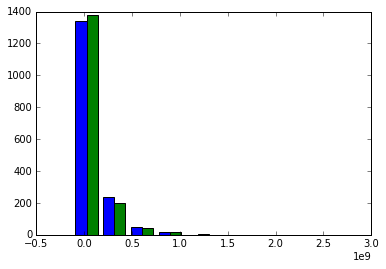

In [46]:
plt.hist([predicted, y_test]) 

## Evaluación

In [47]:
model.score(X_test, y_test)  #R_2 scoree

0.8138436806902174

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. 

**Siempre visualiza tus resultados, aunque tengas un buen score de performance.**

In [48]:
residuals = y_test - predicted
residuals

1377   -1.684279e+07
3019    2.345582e+07
1409    1.232079e+07
463     2.475773e+07
3963    1.544912e+07
            ...     
4096    3.637684e+07
2040    9.454209e+06
1797   -6.330412e+06
1004    9.922260e+05
3260    1.675876e+07
Name: worldwide_gross, Length: 1642, dtype: float64

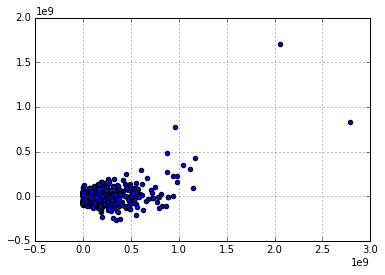

In [49]:
plt.scatter(y_test, residuals)
plt.grid()

In [50]:
ap_residuals = np.abs(residuals)/y_test
for (index,i,c) in zip(ap_residuals.index, ap_residuals,range(len(predicted))):
  if i >= 3 and i <= 4:
    print('Valor real: {}   Valor predicho: {}   Valor  ap_residual: {}'.format(y_test[index],predicted[c],i))

Valor real: 5149131.0   Valor predicho: -13491613.445575714   Valor  ap_residual: 3.620172888507928
Valor real: 19282590.0   Valor predicho: 94442409.81211233   Valor  ap_residual: 3.8978072868900044
Valor real: 8130727.0   Valor predicho: -17219966.35209942   Valor  ap_residual: 3.117887656552657
Valor real: 16425701.0   Valor predicho: 77730544.4198575   Valor  ap_residual: 3.7322512701197654
Valor real: 9443864.0   Valor predicho: -22608688.124420166   Valor  ap_residual: 3.394008228456082
Valor real: 10770993.0   Valor predicho: -21935398.41270733   Valor  ap_residual: 3.0365251757853087
Valor real: 4777465.0   Valor predicho: -13094983.411254406   Valor  ap_residual: 3.740989920649216
Valor real: 9533964.0   Valor predicho: -27757709.836020947   Valor  ap_residual: 3.9114552809325636
Valor real: 5476793.0   Valor predicho: -13923581.15703392   Valor  ap_residual: 3.542287275972256
Valor real: 3582797.0   Valor predicho: -8700764.144165993   Valor  ap_residual: 3.4284837081659925
V

In [51]:
12652599.295355856/4494560.0

2.8150918655788013

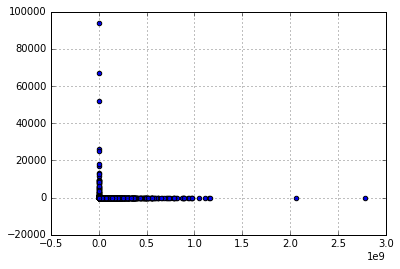

In [52]:
plt.scatter(y_test, ap_residuals)
plt.grid()

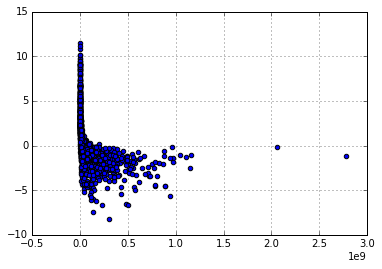

In [53]:
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)
plt.grid()

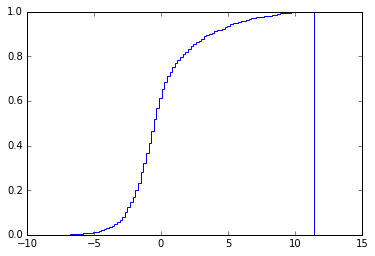

In [54]:
# Funcion cumlativa de la distribucion de los errores
plt.hist(lap_residuals, bins = 100, density = 1, histtype = 'step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

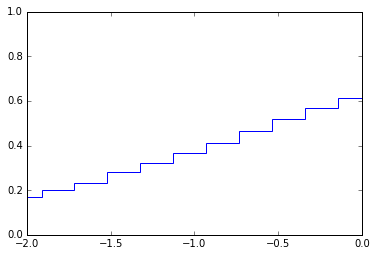

In [55]:
plt.hist(lap_residuals, bins=100, density=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

# Feature Enginnering

Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**


En particular la regresión Lasso es interpretable:

- Mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.

- La regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [0]:
X1 = pd.read_csv('X.csv')
X = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/X_opening.csv')

X.drop('opening_gross', axis = 1, inplace = True)
X.drop('screens', axis = 1, inplace = True)


y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

In [0]:
model = Lasso()

X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [58]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
model.score(X_test, y_test)

0.6138334961536269

In [60]:
len(model.coef_) #Parametros de la regresion lineal

7

In [0]:
var = np.floor(np.log10(np.abs(model.coef_)))

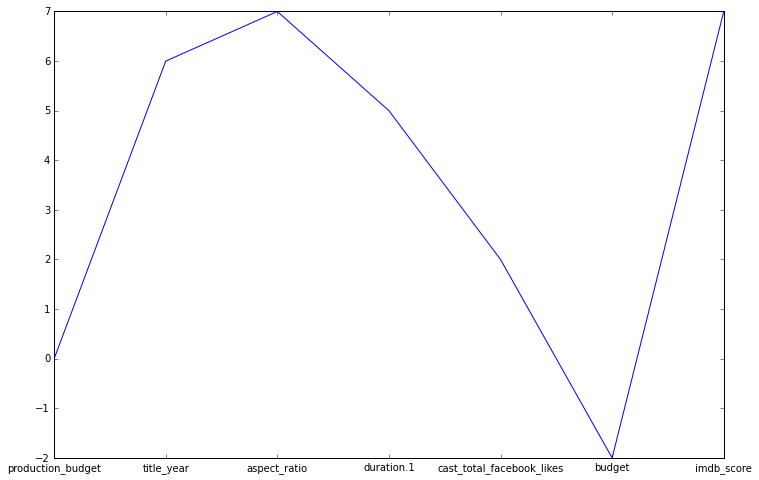

In [62]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns));

De aqui podemos concluir que ciertas **Features** son mas importantes que otras y eso nos da una buena intuicion si es que queremos bajar la dimension y elegir un solo subconjunto

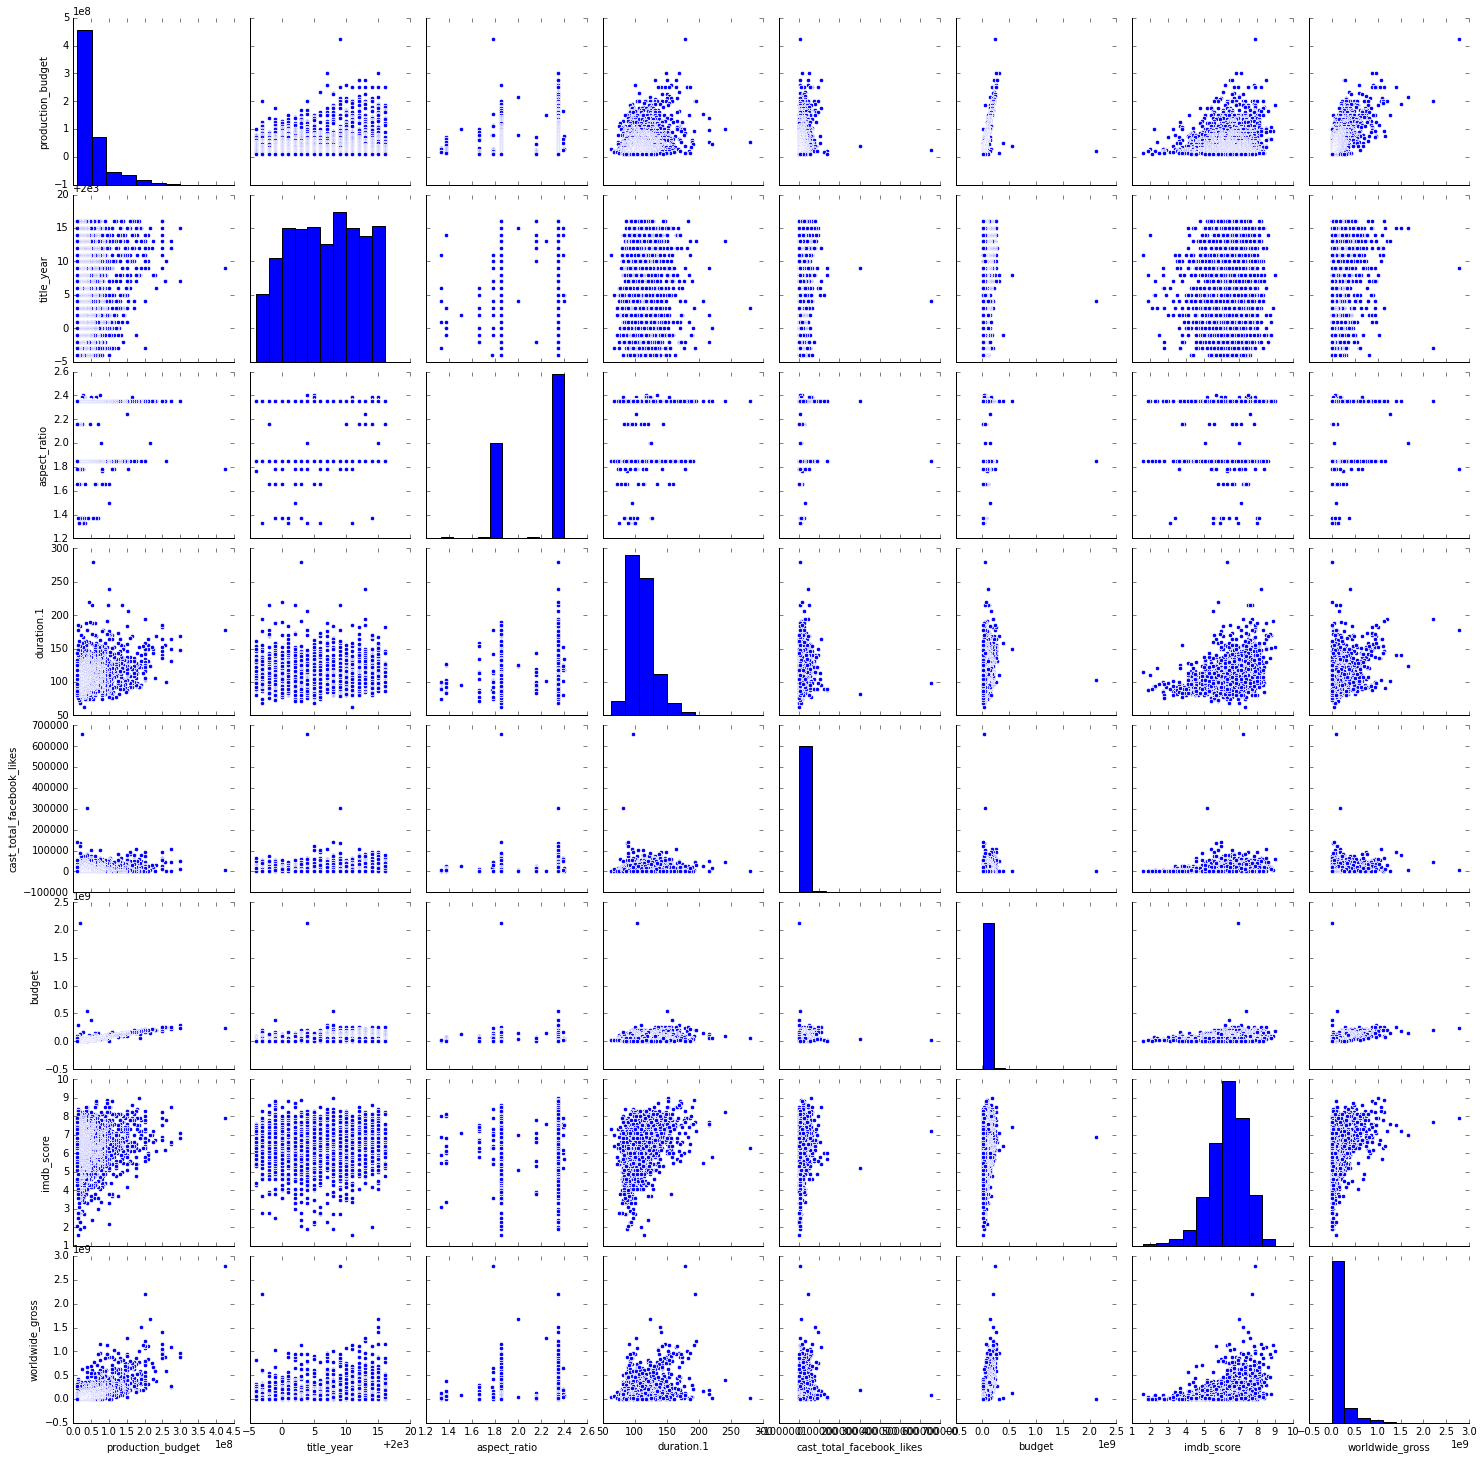

In [63]:
import seaborn as sns

z = pd.concat([X,y], axis = 1)
sns.pairplot(z)

In [0]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
hue = pd.cut(X['production_budget'],8).cat.codes.rename('hue')

In [0]:
z2 = pd.concat([X,clase,hue], axis =1)

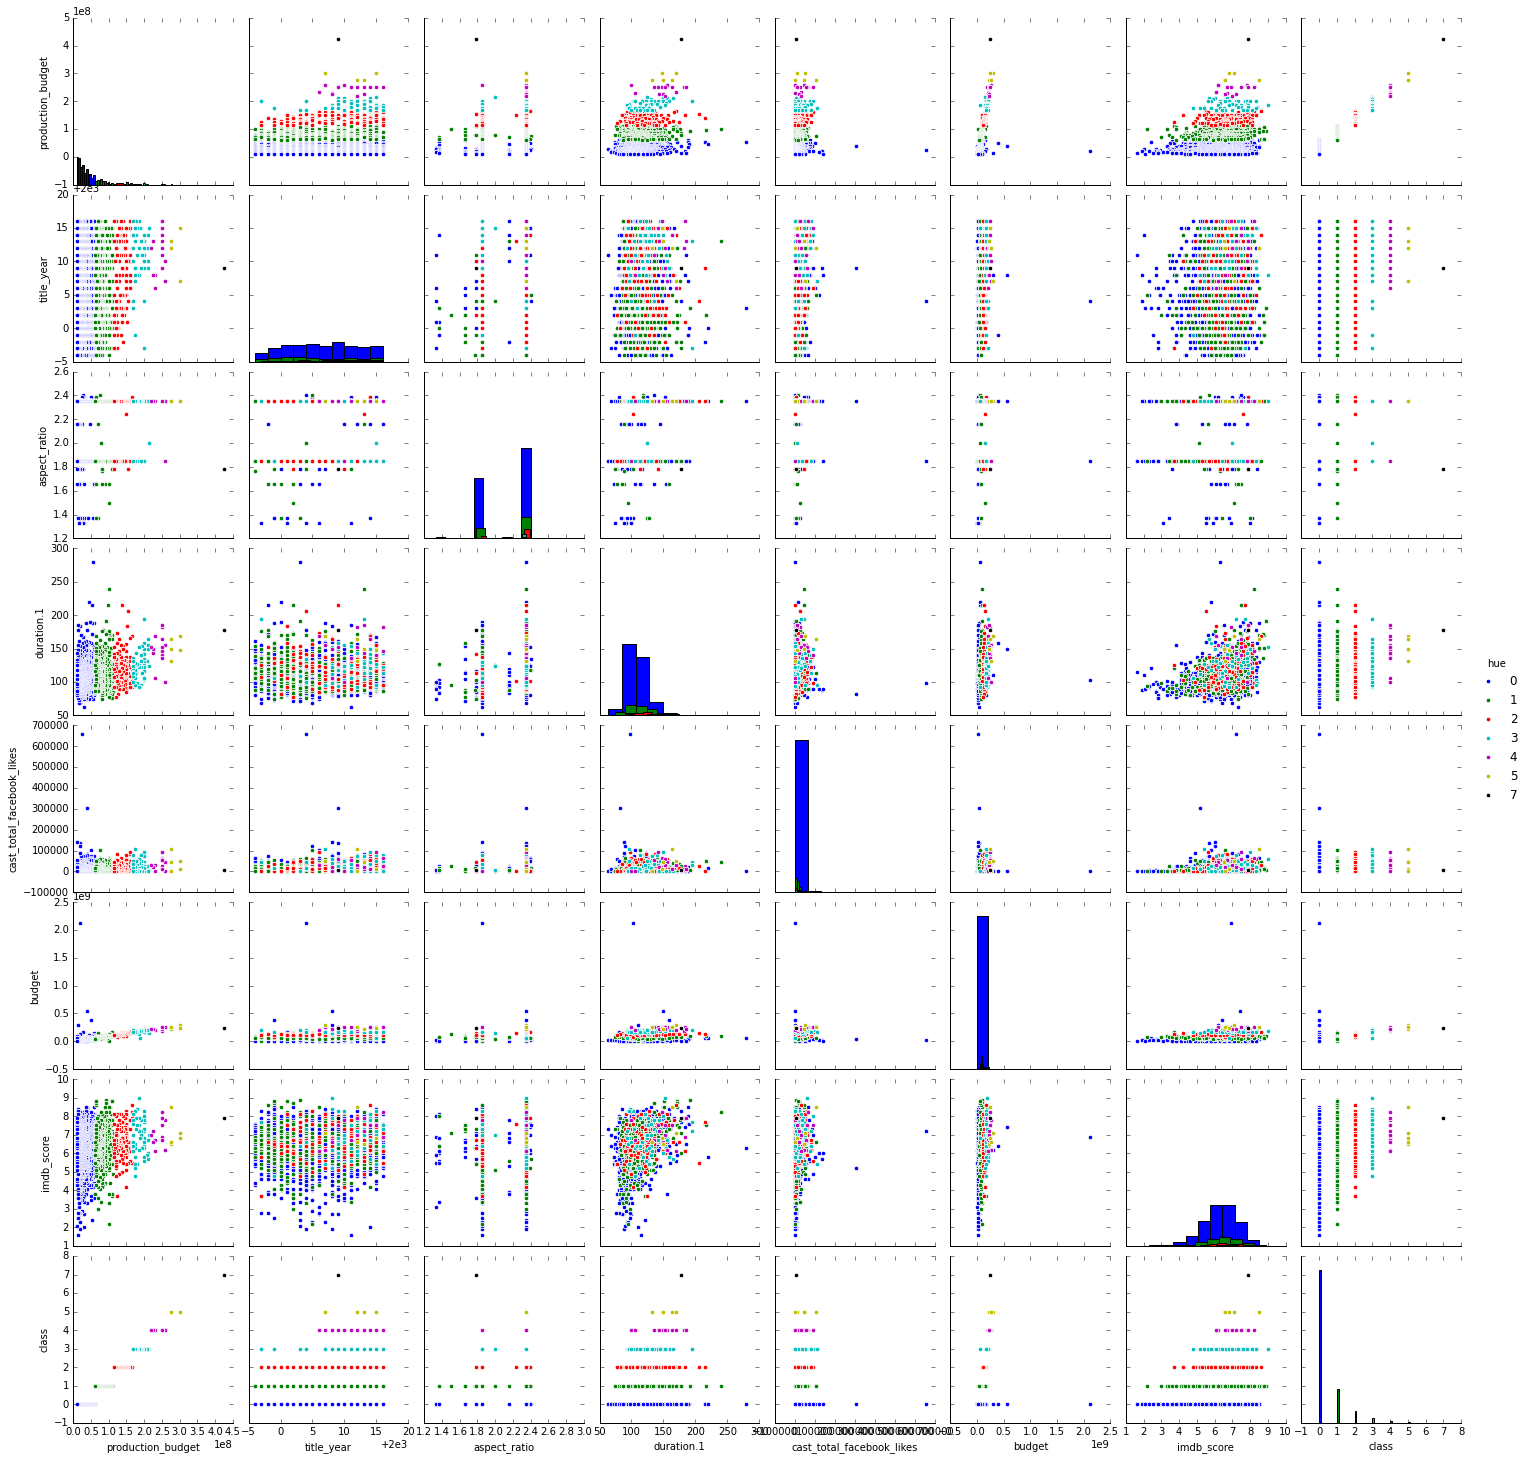

In [66]:
sns.pairplot(z2, hue = 'hue', diag_kind = 'hist')

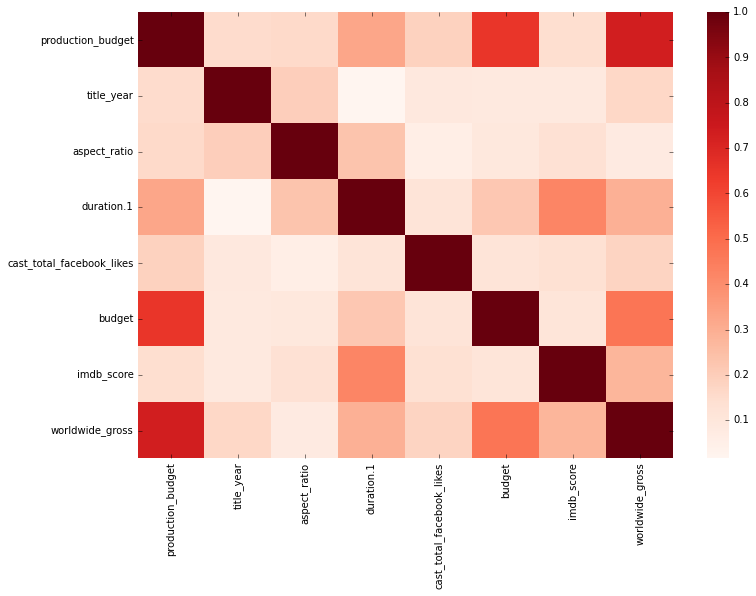

In [67]:
z3 = pd.concat([X,y], axis = 1)
sns.heatmap(z3.corr(), cmap = 'Reds')

## Metodos de selección automatica de features

In [0]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression 
#Cada feature va a ser analizada para ver cuanta informacion aporta y se van a elegir las k mejores


In [69]:
selector = SelectKBest(mutual_info_regression, k = 4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f3caf252950>)

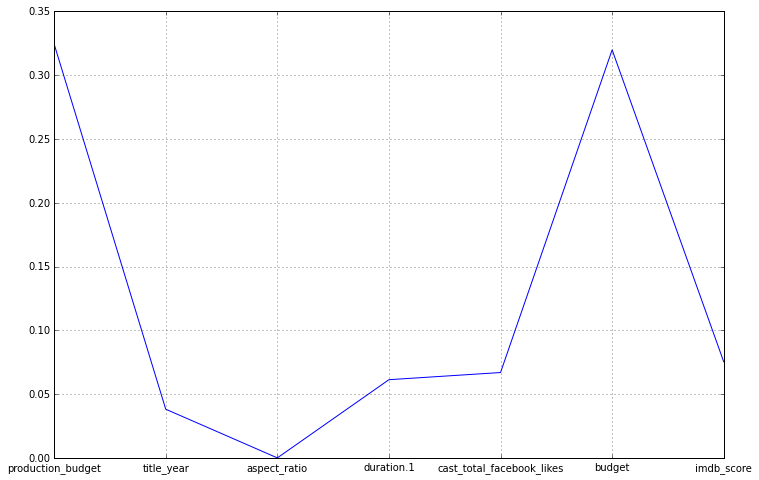

In [70]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns))
plt.grid()

#

Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget

**Guardamos las 5 features entregadas por la interpretacion de nuestra regresion Lasso**

In [0]:
X2 = X[['aspect_ratio','title_year','duration.1','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

**Veamos los resultado del modelo con estas features**

In [0]:
cols2 = ['aspect_ratio','title_year','duration.1','cast_total_facebook_likes','imdb_score']
cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X,y)

X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test 
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test 

In [73]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, y_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.773746665169836e+18, tolerance: 6905632742052811.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.771376743004041e+18, tolerance: 6905632742052811.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

0.5408044030310005
0.154189416976923
0.5499763434066498


No nos fue tan util reducir la dimension

## Creación de Features

### Escalamiento de los datos

In [0]:
X1 = pd.read_csv('X.csv')
X = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/X_opening.csv')

X.drop('opening_gross', axis = 1, inplace = True)
X.drop('screens', axis = 1, inplace = True)


y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
scaler.mean_

array([5.12629855e+07, 2.00618498e+03, 2.15598201e+00, 1.10843844e+02,
       1.34775640e+04, 5.38591813e+07, 6.35825826e+00])

In [78]:
scaler.scale_ #Corresponde a la desviacion estandar de cada feature

array([4.60675801e+07, 5.47848780e+00, 2.51039006e-01, 2.01209168e+01,
       2.24009795e+04, 6.92947563e+07, 1.02096020e+00])

In [79]:
scaler.transform(X_train)

array([[-0.35302452, -1.67655479,  0.77285994, ...,  0.25228522,
        -0.27215885,  1.901878  ],
       [-0.63521864,  1.42649127,  0.77285994, ...,  0.05086546,
        -0.45976323, -0.05706222],
       [-0.46156072, -1.31149055, -1.21886242, ...,  0.48459649,
        -0.34431438,  0.33472582],
       ...,
       [-0.24448833, -1.67655479, -1.21886242, ...,  1.07550815,
        -0.25772775,  0.82446088],
       [-0.35302452,  0.8788949 ,  0.77285994, ..., -0.57660711,
        -0.27215885, -1.33037337],
       [-0.35302452, -0.94642631,  0.77285994, ...,  1.25701807,
        -0.27215885,  0.43267283]])

In [0]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [81]:
model = Lasso()
model_scaled = Lasso()

model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
print(model.score(X_test,y_test))
print(model_scaled.score(X_test_scaled,y_test))

0.548173126677514
0.5481731276390429


**Las regresiones no son sensibles a reescalamiento en cambio los clasificadores si los necesitan**

### Simplificar las tranfomaciones con pipelines

In [83]:
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(),
                             Lasso())


model_scaled.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [84]:
model_scaled.score(X_test, y_test)

0.5481731276390429

### Crear nuevas features de forma automatica

In [85]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [86]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2) # Grado del polinomio
transformer.fit(A)
transformer.transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

**PolynomialFeatures** transforma una matriz $(A1,A2) \ a \ (1,A1,A2,A1^{2},A1.A2,A2^{2})$

In [87]:
transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [88]:
X.shape

(2221, 7)

In [89]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(X)

array([[1.00000000e+00, 4.25000000e+08, 2.00900000e+03, ...,
        5.61690000e+16, 1.87230000e+09, 6.24100000e+01],
       [1.00000000e+00, 3.00000000e+08, 2.00700000e+03, ...,
        9.00000000e+16, 2.13000000e+09, 5.04100000e+01],
       [1.00000000e+00, 3.00000000e+08, 2.01500000e+03, ...,
        6.00250000e+16, 1.66600000e+09, 4.62400000e+01],
       ...,
       [1.00000000e+00, 1.05000000e+07, 2.00700000e+03, ...,
        1.00000000e+14, 6.50000000e+07, 4.22500000e+01],
       [1.00000000e+00, 1.01000000e+07, 2.01000000e+03, ...,
        2.84047994e+15, 2.82469612e+08, 2.80900000e+01],
       [1.00000000e+00, 1.01000000e+07, 2.00700000e+03, ...,
        1.21000000e+14, 6.38000000e+07, 3.36400000e+01]])

In [90]:
model_poly = make_pipeline(PolynomialFeatures(2),
                           Lasso())

model_poly.fit(X_train, y_train)
model_poly.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1219941040733995e+19, tolerance: 6601098080398815.0
  positive)


0.6216350774274988

### Crear features categoricas

In [91]:
d = pd.DataFrame([['Chile','Colombia','Colombia','Venezuela'],['hombre','mujer','hombre','mujer']])
d = d.T
d.columns = pd.Index(['pais','genero'])
d

,pais,genero
0,Chile,hombre
1,Colombia,mujer
2,Colombia,hombre
3,Venezuela,mujer


In [92]:
pd.get_dummies(d)

,pais_Chile,pais_Colombia,pais_Venezuela,genero_hombre,genero_mujer
0,1,0,0,1,0
1,0,1,0,0,1
2,0,1,0,1,0
3,0,0,1,0,1


**Utilizando el metodo OneHotEnconder de sklearn**

In [93]:
movies_obj = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/movies_obj.csv')
movies_obj

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Color,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Color,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Color,English,UK,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Color,English,USA,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,English,Canada,Comedy|Drama,NaN,fraud|postal worker|prison|theft|trial,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe
5039,The Following,Color,English,USA,Crime|Drama|Mystery|Thriller,TV-14,cult|fbi|hideout|prison escape|serial killer,NaN,Natalie Zea,Valorie Curry,Sam Underwood
5040,A Plague So Pleasant,Color,English,USA,Drama|Horror|Thriller,NaN,NaN,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler
5041,Shanghai Calling,Color,English,USA,Comedy|Drama|Romance,PG-13,NaN,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe


In [94]:
movies_obj.apply(pd.Series.nunique).sort_values()

color                2
content_rating      18
language            47
country             65
genres             914
actor_1_name      2097
director_name     2398
actor_2_name      3032
actor_3_name      3521
plot_keywords     4760
movie_title       4917
dtype: int64

#### Encoding Binario

Esta tecnica no es canónica por lo que tendremos que buscarla en otra librería. Sin embarho el autor tuvo la buena idea de hacer su API compatible con de sklearn, asi que no tendremos ninguna dificultad al usarla.

$Categoría \rightarrow Numero \rightarrow Binario \rightarrow Columnas$

In [95]:
!pip install category_encoders

In [0]:
categoricals = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/categoricals.csv').set_index('Unnamed: 0')

In [97]:
categoricals.head(2)

,actor_1_name,director_name
Unnamed: 0,,
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker


In [98]:
categoricals = categoricals.reset_index(drop = True).fillna(0)
categoricals

,actor_1_name,director_name
0,CCH Pounder,James Cameron
1,Doug Walker,Doug Walker
2,Johnny Depp,Gore Verbinski
3,Christoph Waltz,Sam Mendes
4,Tom Hardy,Christopher Nolan
...,...,...
4099,Shane Carruth,Shane Carruth
4100,Ian Gamazon,Neill Dela Llana
4101,Richard Jewell,Anthony Vallone
4102,Alan Ruck,Daniel Hsia


In [99]:
X_binenc = pd.concat([X,categoricals], axis = 1)
X_binenc.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,actor_1_name,director_name
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,CCH Pounder,James Cameron
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,Doug Walker,Doug Walker
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,Johnny Depp,Gore Verbinski
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,Christoph Waltz,Sam Mendes
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,Tom Hardy,Christopher Nolan


In [100]:
import category_encoders as ce

enconder = ce.BinaryEncoder(cols = ['actor_1_name','director_name'])
enconder.fit_transform(X_binenc)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,actor_1_name_0,actor_1_name_1,actor_1_name_2,actor_1_name_3,actor_1_name_4,actor_1_name_5,actor_1_name_6,actor_1_name_7,actor_1_name_8,actor_1_name_9,actor_1_name_10,actor_1_name_11,director_name_0,director_name_1,director_name_2,director_name_3,director_name_4,director_name_5,director_name_6,director_name_7,director_name_8,director_name_9,director_name_10,director_name_11
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,300000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
3,275000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,275000000.0,2013.0,2.35,150.0,45757.0,215000000.0,6.5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,1,0,1,1,0,1
4100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0
4101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1
4102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,0,0


In [0]:
X_binenc = enconder.fit_transform(X_binenc)

In [103]:
X_binenc.shape

(4104, 31)

# Métodos de evaluación

Por ahora hemos visto que:

- Se necesita separar de forma aleatoria en datos de entrenamiento y testeo para poder evaluar performance del algoritmo

- Existen diversas métricas para evaluar rendimiento, y elegimos la nuestra según las caracteristicas de nuestro problema

- Es útil apoyar la evaluación con visualizaciones de errores, como por ejemplo scatterplots de residuales

Sin embargo nuestro método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos nuestros datos de forma aleatoria:

- Podemos tener suerte y caer en un train set y test set que sea ideal para nuestro modelo.
- Podemos tener pésima performance con esa separación de datos pero no en otros.

**Controlar la aleatoridad en train_test_split**

train_test_split separa cada vez que lo llamamos los datos de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer nuestros experimentos reproducibles utilizaremos el parametro *random_state.*

## Cross Validation

In [0]:
X = pd.read_csv('https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/X_opening.csv')


In [0]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, random_state = 1)

In [123]:
pd.DataFrame.equals(X_train, X2_train)

True

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y,cv = 5,scoring = 'r2')
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [125]:
scores.mean()

0.44964021745791766

## Selección de modelos

In [127]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y, return_train_score=True, cv =5)
results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.01520538, 0.02470398, 0.02447295, 0.02436757, 0.01974964]),
 'score_time': array([0.00259233, 0.00197005, 0.00203538, 0.00204301, 0.00178814]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [128]:
test_scores = results['test_score']
train_scores = results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores))

0.44964021745791766
0.7491178363039036


Tenemos bias por lo que buscamos modelos mas complejos

**Validation Curves y Learning Curves**

In [131]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(n_neighbors = 10),X,y,cv = 5, return_train_score=True)

{'fit_time': array([0.00981688, 0.00297189, 0.00312471, 0.00311232, 0.00295448]),
 'score_time': array([0.00699306, 0.00463057, 0.00479484, 0.0043869 , 0.00423098]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [0]:
from sklearn.model_selection import validation_curve

In [0]:
n = np.arange(2,50,2)

In [0]:
train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             X,
                                             y,
                                             param_name = 'n_neighbors',
                                             param_range = n,
                                             cv = 5)

In [136]:
np.mean(train_scores, axis = 1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

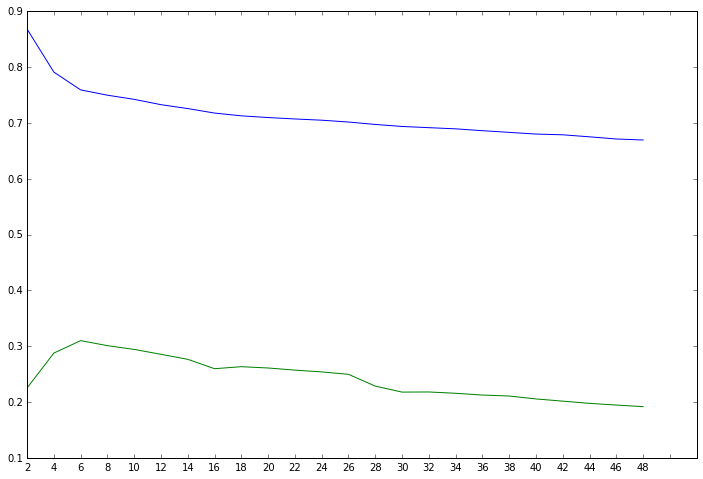

In [138]:
plt.plot(np.mean(train_scores, axis = 1))
plt.plot(np.mean(test_scores, axis = 1))
plt.xticks(np.arange(25),n);